In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import shap
import numpy as np
shap.initjs()

In [2]:
df = pd.DataFrame({
    "Age": [25, 45, 65, 80, 50, 85],
    "HeartRate": [70, 85, 100, 120, 90, 130],
    "Death": [0, 0, 1, 1, 0, 1]
})
df

,Age,HeartRate,Death
0,25,70,0
1,45,85,0
2,65,100,1
3,80,120,1
4,50,90,0
5,85,130,1


In [4]:
X = df[['Age', 'HeartRate']]
y = df['Death']
lg = LogisticRegression()
lg.fit(X, y)
lg.coef_, lg.intercept_

(array([[0.34818422, 0.23419991]]), array([-42.29697154]))

In [6]:
values = (X - X.mean(axis=0)) * lg.coef_
values

,Age,HeartRate
0,-11.606141,-6.830831
1,-4.642456,-3.317832
2,2.321228,0.195167
3,7.543991,4.879165
4,-2.901535,-2.146833
5,9.284913,7.221164


In [7]:
values.abs().mean(axis=0)

Age          6.383377
HeartRate    4.098498
dtype: float64

In [8]:
base_values = X.mean(axis=0).values @ lg.coef_.T + lg.intercept_
base_values

array([1.23859918])

In [14]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

# Predict Proba

In [15]:
sigmoid(base_values + values.values.sum(axis=1))

array([3.39501586e-08, 1.20305280e-03, 9.77134474e-01, 9.99998834e-01,
       2.16731740e-02, 9.99999980e-01])

In [19]:
explainer = shap.Explainer(model = lg, masker=X, feature_names=[['Age', 'HeartRate']])
shap_values = explainer(X)
shap_values

.values =
array([[-11.60614075,  -6.83083071],
       [ -4.6424563 ,  -3.31783206],
       [  2.32122815,   0.19516659],
       [  7.54399149,   4.87916479],
       [ -2.90153519,  -2.14683251],
       [  9.2849126 ,   7.22116389]])

.base_values =
array([1.23859918, 1.23859918, 1.23859918, 1.23859918, 1.23859918,
       1.23859918])

.data =
array([[ 25,  70],
       [ 45,  85],
       [ 65, 100],
       [ 80, 120],
       [ 50,  90],
       [ 85, 130]], dtype=int64)

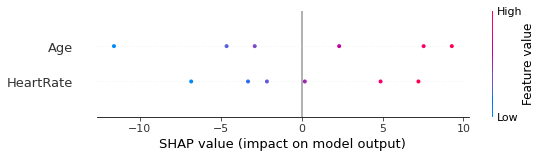

In [20]:
shap.summary_plot(shap_values)

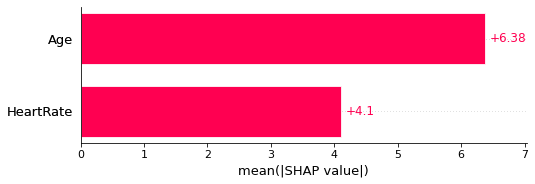

In [21]:
shap.plots.bar(shap_values)

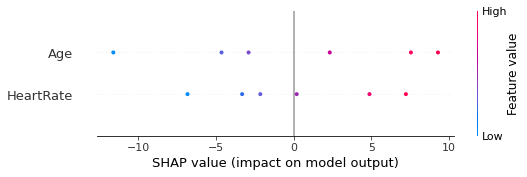

In [23]:
shap.plots.beeswarm(shap_values)

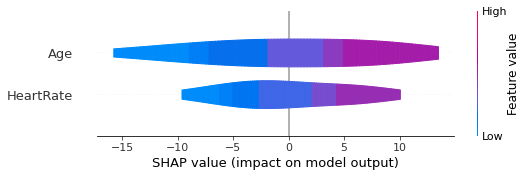

In [24]:
shap.plots.violin(shap_values)

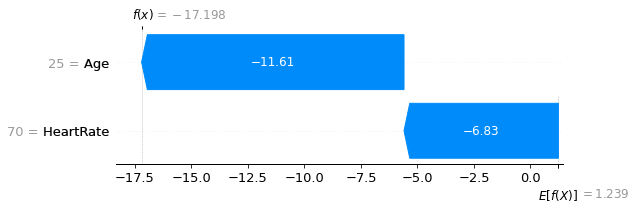

In [26]:
shap.plots.waterfall(shap_values[0])

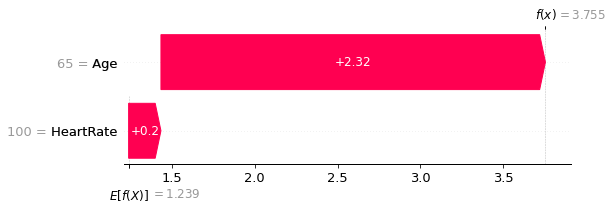

In [27]:
shap.plots.waterfall(shap_values[2])

In [32]:
shap.plots.force(shap_values[0])

In [33]:
shap.plots.force(shap_values)

In [35]:
group_mask = np.array([False if v == 0 else True for v in y])
group_mask

array([False, False,  True,  True, False,  True])

In [36]:
shap_values.values[group_mask].mean(0) - shap_values.values[~group_mask].mean(0)

array([12.76675483,  8.19699685])

C:\Users\nam09\AppData\Roaming\Python\Python312\site-packages\shap\plots\_group_difference.py:42: RuntimeWarning: Mean of empty slice.
  vs.append(shap_values[r].mean(0) - shap_values[~r].mean(0))
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


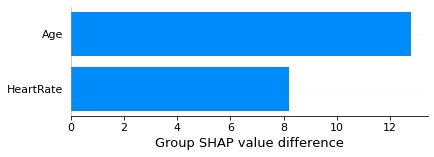

In [38]:
shap.plots.group_difference(shap_values.values, group_mask, feature_names= X.columns)

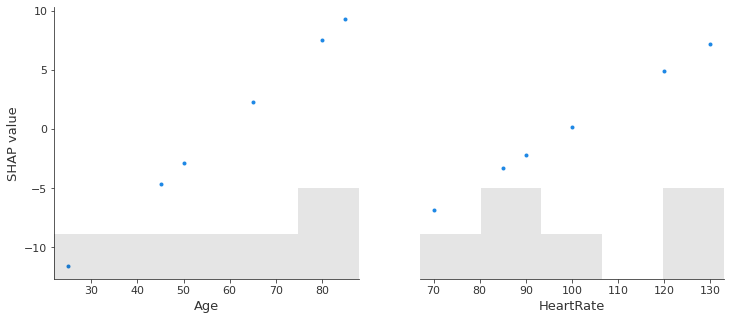

In [39]:
shap.plots.scatter(shap_values)